<a href="https://colab.research.google.com/github/GitMishka/2021_TSLAstock_Analysis-/blob/master/crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFEN

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0    Central
dtype: object


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

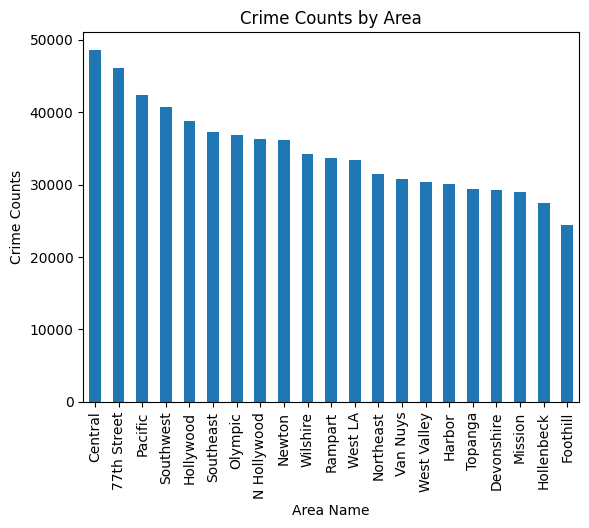

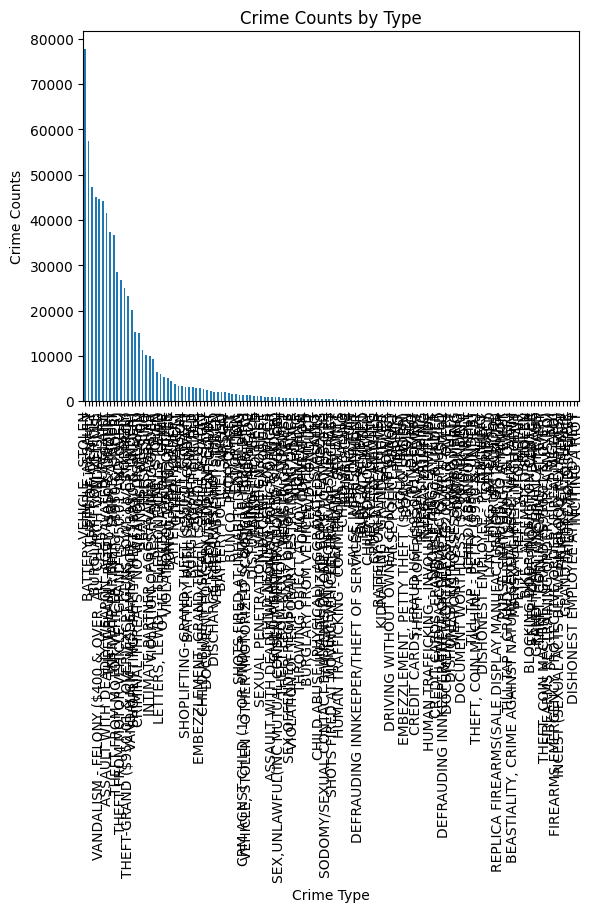

M    301310
F    268640
X     61664
H        82
Name: Vict Sex, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

30-44    198659
<18      195953
18-29    145394
45-59    118751
60+       67722
Name: AgeGroup, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files


df = pd.read_csv('/content/drive/MyDrive/Projects/ETL/Crime_Data_from_2020_to_Present.csv')

print(df.head())

print(df.describe(include='all'))

crime_types = df['Crm Cd Desc'].value_counts()
print(crime_types)
crime_types.to_csv('crime_types.csv')
files.download('crime_types.csv')

top_area = pd.Series(df['AREA NAME'].value_counts().idxmax())
print(top_area)
top_area.to_csv('top_area.csv')
files.download('top_area.csv')

df['AREA NAME'].value_counts().plot(kind='bar')
plt.title('Crime Counts by Area')
plt.xlabel('Area Name')
plt.ylabel('Crime Counts')
plt.show()

df['Crm Cd Desc'].value_counts().plot(kind='bar')
plt.title('Crime Counts by Type')
plt.xlabel('Crime Type')
plt.ylabel('Crime Counts')
plt.show()

victim_sex = df['Vict Sex'].value_counts()
print(victim_sex)
victim_sex.to_csv('victim_sex.csv')
files.download('victim_sex.csv')

bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-29', '30-44', '45-59', '60+']
df['AgeGroup'] = pd.cut(df['Vict Age'], bins=bins, labels=labels, right=False)
age_group = df['AgeGroup'].value_counts()
print(age_group)
age_group.to_csv('age_group.csv')
files.download('age_group.csv')
